# Ejemplos de perceptrón y regresión logística


Perceptrón en la compuerta AND

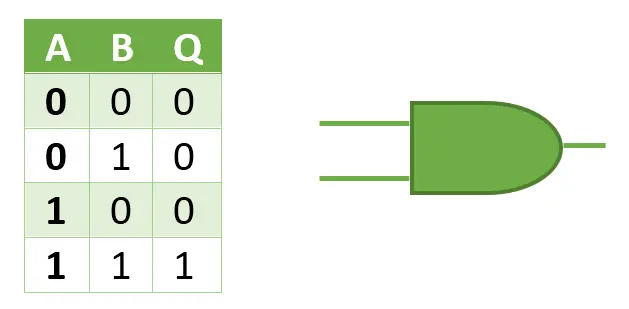

In [ ]:
import numpy as np

class Perceptron(object):
  """ Perceptron
  Parameters
  ------------
  eta: float
    Learning rate (0.0 < eta < 1.0)
  n_iter: int
    Number or iteration over the training set
  random_state: int
    Random number generator seed for weight initalization

  Attributes
  ------------
  w_ : 1d_array
    Weights after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data
    Parameters
    ------------
    X : {np.array}, shape = [n_samples, m_features]
      Training vectors with n_samples samples and m_features features
    y : {np.array}, shape = [n_samples]
      Target values
    """
    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_= np.zeros(1 + len(X[1]))
    else:
      self.w_= rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []
    #print(self.w_)
    for _ in range(self.n_iter):
      errors = 0
      for xi, yi in zip(X, y):
        update = self.eta * (yi - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        #print("xi : ",xi)
        #print("up : ",update)
        #print("pesos : ",self.w_)
        errors += int(update != 0.0)
      self.errors_.append(errors)
      #print('pesos ',self.w_)
    return self

  def net_input(self, X):
    """Calculate cell input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """Return class label after unit step"""
    #print(X)
    #print("dot "+str(self.net_input(X)))
    #print("pred "+str(np.where(self.net_input(X) >= 0.0, 1, -1)))
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [ ]:
# Función para graficar
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Superficies de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Conjuntos de cada clase
    plt.scatter(X[:,0],
                X[:,1],
                alpha=0.9,
                c=colors[y],
                edgecolor='black',)


In [ ]:
X = np.array([[],[],[],[]])
y = np.array([])
#print(X, X.shape[1])
#print(y)

ppn = Perceptron(n_iter=20, eta=0.85)
ppn.fit(X, y)
print('Pesos: %s' % ppn.w_)


In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('A')
plt.ylabel('B')
#plt.legend(loc='upper left')
plt.show()

# Ejemplo con Iris



In [ ]:
# Iris Dataset
import pandas as pd
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('https://bit.ly/38XWXS4', header=None)
df.head()

In [ ]:
import seaborn as sns
sns.histplot(x = df[4], shrink= 0.8)

In [ ]:
df.iloc[:,4].unique()

In [ ]:
# sepal length & petal length
X = df.iloc[0:100, [0,2]].values
# Iris-setosa & Iris-versicolor
y = df.iloc[0:100, 4].values
y = np.array(np.where(y == 'Iris-setosa', -1, 1))
print(type(y))
y

In [ ]:
#Se grsfican las muestras
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0],X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0],X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc='upper left')
plt.show()
print(type(y))

Se entrena el perceptrón y se grafican las clasificaciones erroneas en cada época

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Época')
plt.ylabel('Total de errores')
plt.show()
print(type(y))

In [ ]:
# w0 + w1*x1 + w2*x2
# => x2 = -(w0 + w1*x1) / w2
# Borde de decision
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0]+ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1, x2, 'g', label = "Borde de Decision")

# Clase -1 : setosa
registros = y == -1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='r', marker='o', label="setosa")
# Clase 1 : versicolor
registros = y == 1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='b', marker='x', label="versicolor")

plt.legend()
plt.grid(color = 'lightgray', linestyle = '--')

In [ ]:
plot_decision_regions(X, y, classifier=ppn)#, resolution=2)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
#plt.legend(loc='upper left')
plt.show()

In [ ]:
sp = 1.2

x = np.arange(-5, 5, sp)
y = np.arange(-5, 5, sp)
xx, yy = np.meshgrid(x, y)

plt.scatter(xx, yy)
plt.show()

# Ejemplo con información de ventas de celulares

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.countplot(x='price_range',data=df)

In [ ]:
sns.distplot(df['battery_power'].dropna(),kde=True)

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.loc[:,['ram', 'battery_power']]#drop('price_range',axis=1)
y = np.array(df['price_range'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
print('Total de etiquetas en y       :', np.bincount(y))
print('Total de etiquetas en y_train :', np.bincount(y_train))
print('Total de etiquetas en y_test  :', np.bincount(y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Vemos las primeras 5')
print(X_train_std[:5])
print('Y las últimas 5')
print(X_train_std[-5:])

In [ ]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=60, eta0=0.05, random_state=1)
#ppn = Perceptron(max_iter=40, random_state=1)
ppn.fit(X_train_std, y_train)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Errores de clasificación : ',(y_test-y_pred).sum())

In [ ]:
ppn.coef_

In [ ]:
print('Exactitud : ',ppn.score(X_test_std,y_test))

In [ ]:
from sklearn.metrics import accuracy_score
print('Exactitud : ',accuracy_score(y_test,y_pred))

In [ ]:
print(y_train.shape)
X_train_std.shape

In [ ]:
print(y_test.shape)
X_test_std.shape

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plotting decision regions
plot_decision_regions(X_train_std, y_train, clf=ppn)

# Adding axes annotations
plt.xlabel('ram [std]')
plt.ylabel('battery_power [std]')
plt.title('Perceptrón en Rango de Precio')
plt.show()

Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=50.0, random_state=1) # C => inverso de la regularización
                                  # valor pequeño => reglurarización más fuerte
lr.fit(X_train_std, y_train)

In [ ]:
y_pred = lr.predict(X_test_std)
print('Errores de clasificación : ',(y_test-y_pred).sum())
print('Exactitud : ',lr.score(X_test_std,y_test))

In [ ]:
# Plotting decision regions
plot_decision_regions(X_train_std, y_train, clf=lr)

# Adding axes annotations
plt.xlabel('ram [std]')
plt.ylabel('battery_power [std]')
plt.title('Perceptrón en Rango de Precio (train)')
plt.show()

In [ ]:
# Plotting decision regions
plot_decision_regions(X_test_std, y_test, clf=lr)

# Adding axes annotations
plt.xlabel('BMI [std]')
plt.ylabel('Insulin [std]')
plt.title('Perceptrón en Rango de Precio (test)')
plt.show()

--------------